In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import streamlit as st
import pickle
import joblib

In [33]:
test=pd.read_csv('test.csv')
#charger les donnees de test.csv
train=pd.read_csv('train.csv')
#charger les donnees de train.csv
sample=pd.read_csv('sample_submission.csv')
#charger les donnees de sample_submission.csv

In [36]:
#nous allons essayer de fusionner les dataframes en un seul dataframe afin de mieux manipuler les données
#ajouter la colone 'SalePrice' au dataframe test
# Fusionner les DataFrames en utilisant une colonne commune 'id'
new_df = pd.merge(test, sample[['Id', 'SalePrice']], on='Id', how='left' , suffixes=('_test', '_sample'))
new_df.shape

(4379, 84)

In [37]:
#maintenant on va fusionner le nouveau dataframe au dataframe 'train'
# Concaténer les deux DataFrames en un seul
df = pd.concat([train, new_df], ignore_index=True)
# Écrire le DataFrame fusionné dans un fichier CSV
df.to_csv('test.csv', index=False)

In [38]:
#on charge de nouveau le fichier 'test.csv'
test=pd.read_csv('test.csv')

In [39]:
#ici on voit clairement que les deux dataframes ont été fusionné avec succès
test.shape

(5839, 85)

In [40]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_test,SalePrice_x,SalePrice_y,SalePrice_sample
count,5839.000000,5839.000000,4835.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5800.000000,5838.000000,...,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,1460.000000,1460.000000,2919.000000,1459.000000,1459.000000
mean,1095.187532,57.017469,69.675491,10342.500942,6.094194,5.569961,1971.290289,1984.565165,102.944310,442.531860,...,15.561569,2.505395,47.156876,6.267512,2007.804247,180921.195890,180921.195890,180052.854647,179183.918243,179183.918243
std,759.562857,42.402144,23.814333,8995.435843,1.396307,1.112787,30.242032,20.768867,180.173807,455.777809,...,55.963949,37.982054,532.876922,2.709282,1.321370,79442.502883,79442.502883,57381.565721,16518.303051,16518.303051
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,34900.000000,34900.000000,135751.318893,135751.318893
25%,487.000000,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000,129975.000000,154795.084126,168703.011202,168703.011202
50%,974.000000,50.000000,69.000000,9466.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.000000,...,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,163000.000000,176734.841494,179208.665698,179208.665698
75%,1460.000000,70.000000,80.000000,11600.000000,7.000000,6.000000,2001.000000,2004.000000,165.000000,724.000000,...,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,214000.000000,191895.744157,186789.409363,186789.409363
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,755000.000000,755000.000000,281643.976117,281643.976117


In [41]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_test,SalePrice_x,SalePrice_y,SalePrice_sample
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500.0,NaN,NaN,NaN,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500.0,NaN,NaN,NaN,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500.0,NaN,NaN,NaN,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000.0,NaN,NaN,NaN,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000.0,NaN,NaN,NaN,NaN


In [42]:
#lister les differentes colonnes du dataframe
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [43]:
colonnes=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
test=test[colonnes]

In [44]:
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5839 non-null   int64  
 1   MSSubClass     5839 non-null   int64  
 2   MSZoning       5835 non-null   object 
 3   LotFrontage    4835 non-null   float64
 4   LotArea        5839 non-null   int64  
 5   Street         5839 non-null   object 
 6   Alley          380 non-null    object 
 7   LotShape       5839 non-null   object 
 8   LandContour    5839 non-null   object 
 9   Utilities      5837 non-null   object 
 10  LotConfig      5839 non-null   object 
 11  LandSlope      5839 non-null   object 
 12  Neighborhood   5839 non-null   object 
 13  Condition1     5839 non-null   object 
 14  Condition2     5839 non-null   object 
 15  BldgType       5839 non-null   object 
 16  HouseStyle     5839 non-null   object 
 17  OverallQual    5839 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
5835,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
5836,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
5837,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [45]:
l_column=list(test.columns)
len_feature=len(l_column)
l_column

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [46]:
#creation d'un nouveau dataframe où sont stockés les features qu'ont a choisi
new_df = pd.DataFrame({'BedroomAbvGr':test['BedroomAbvGr'],'LotArea': test['LotArea'],'OverallQual':test['OverallQual'],'YearBuilt':test['YearBuilt'],'YearRemodAdd':test['YearRemodAdd'],'TotalBsmtSF':test['TotalBsmtSF'],'GrLivArea':test['GrLivArea'], 'FullBath':test['FullBath'], 'GarageCars':test['GarageCars'],'SalePrice':test['SalePrice']})

In [47]:
new_df.head()

,BedroomAbvGr,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,3,8450,7,2003,2003,856.0,1710,2,2.0,208500.0
1,3,9600,6,1976,1976,1262.0,1262,2,2.0,181500.0
2,3,11250,7,2001,2002,920.0,1786,2,2.0,223500.0
3,3,9550,7,1915,1970,756.0,1717,1,3.0,140000.0
4,4,14260,8,2000,2000,1145.0,2198,2,3.0,250000.0


In [48]:
#nettoyage des donnees
new_df=new_df.fillna(0)

In [49]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('SalePrice', axis=1), new_df['SalePrice'], test_size=0.2, random_state=0)

# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)




In [50]:
#afficher les coefficients et les interceptions
print("Interception: ", model.intercept_)
print("Coefficients: ", model.coef_)

Interception:  -353020.5706263141
Coefficients:  [-2.55435227e+03  3.67409224e-01  4.49904978e+03  5.51766104e+01
  1.16449513e+02  4.88540167e+00  1.80494910e+01 -2.31009794e+03
  3.76320191e+03]


In [51]:
#taille des predictions
y_pred = model.predict(X_test)
print("Type des prédictions:", type(y_pred))
print("Taille des prédictions:", y_pred.shape)

Type des prédictions: <class 'numpy.ndarray'>
Taille des prédictions: (1168,)


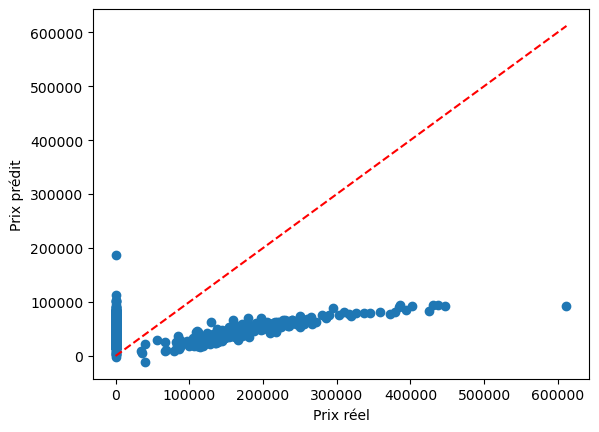

In [52]:
#nuage de points du prix prédit et du jeu y_test pour voir si les données tombent sur une ligne droite à 45 degrés
plt.scatter(y_test, y_pred)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.show()

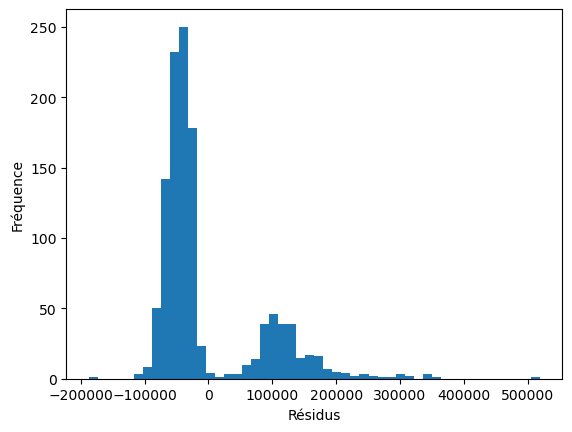

In [53]:
#histogramme des résidus
residus = y_test - y_pred
plt.hist(residus, bins=50)
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

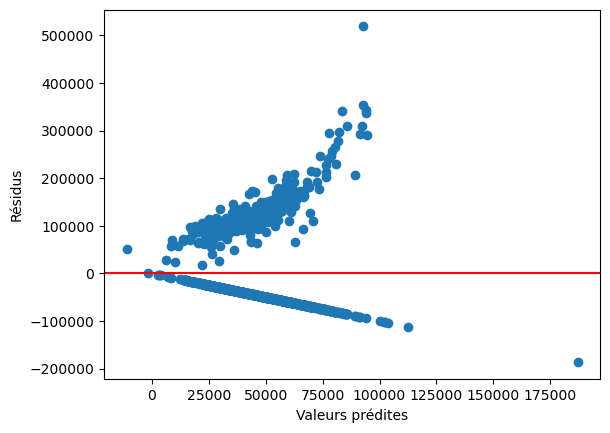

In [54]:
#le nuage de points des valeurs résiduelles et prédites
plt.scatter(y_pred, residus)
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [55]:
#afficher les metriques du model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#Le RMSE mesure l'écart moyen entre les valeurs prédites et les valeurs réelles, en unité de la variable cible (dans notre cas, les dollars).
#Plus le RMSE est faible, meilleure est la performance du modèle.
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 66431.20662768501
MSE: 6803269287.931833
RMSE: 82481.93310011493


In [56]:
#Le R2 mesure la proportion de variance de la variable cible qui est expliquée par le modèle.
#Il prend des valeurs entre 0 et 1, où 1 signifie que le modèle explique parfaitement la variance de la variable cible et 0 signifie que le modèle n'explique aucune variance.
#Plus le R2 est proche de 1, meilleure est la performance du modèle.
r2 = r2_score(y_test, y_pred)
print("R-square value:", r2)

R-square value: 0.0241212940443869


In [57]:

# Enregistrer le modèle en tant que fichier 
def evaluate_model(model):
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    rmse_train=mean_squared_error(y_train, train_pred, squared=False)
    rmse_test=mean_squared_error(y_test, test_pred, squared=False)
    return rmse_train,rmse_test


In [58]:
# Charger le modèle depuis le fichier pickle
joblib.dump(model, "model1.joblib")

['model1.joblib']